# Imports

In [12]:
import pickle
import pandas as pd
%pylab inline
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns  
import sklearn
# Import all of the scikit learn stuff
from __future__ import print_function
from sklearn.decomposition import TruncatedSVD
from sklearn.feature_extraction.text import TfidfVectorizer 
from sklearn.feature_extraction.text import CountVectorizer 
from sklearn.preprocessing import Normalizer
from sklearn import metrics
from sklearn.cluster import KMeans, MiniBatchKMeans
from sklearn.decomposition import NMF
import nltk
import pandas as pd
from nltk.tokenize import sent_tokenize
from nltk.tokenize import TreebankWordTokenizer
from nltk.tokenize import word_tokenize
from nltk.chunk import ne_chunk
from textblob import TextBlob
from nltk.util import ngrams
from collections import Counter
from operator import itemgetter
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from nltk.tag import pos_tag
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.decomposition import NMF, LatentDirichletAllocation
from sklearn.decomposition import PCA
import pyLDAvis
import pyLDAvis.sklearn
pyLDAvis.enable_notebook()

Populating the interactive namespace from numpy and matplotlib


# Load Data

In [13]:
with open('/Users/cyrusrustomji/Documents/metis/personal_metis/passion_projects/bball_4/Code/insta.pkl', 'rb') as handle:
    data = pickle.load(handle)
data

0   \
LeBron James               Life s most persistent and urgent question is...   
Kevin Durant              Thanks for having us at  BrainstormHealth  ari...   
Chris Paul                Prayers to the kids and families affected by t...   
Paul George               Happy Mother s Day my love      thank you for ...   
Demarcus Cousins          TMC   Quote me on this I got a lot more to pro...   
Deandre Jordan            Had a great time at the launch of  BlackOps4  ...   
Aaron Gordon               kyrieirving big time shoe, homie  Congrats an...   
Julius Randle                     Work  amoila_cesar         jonathan j lim   
Jabari Parker                                                                 
Isaiah Thomas                                TBT Back 2 Back Covers  uw_mbb   
Tyreke Evans                                                    Out of date   
Zach Lavine                livelovedev getting me right all summer  InTh...   
Carmelo Anthony                                                               
Derrick Favors            Congrats to my lil bro  b favors2 on his gradu...   
Trevor Ariza                                                           None   
Enes Kanter                Take your Racist comments and shove it up you...   
Will Barton                                  going Viral for da Family  PTF   
Jusuf Nurkic              Nije nikome dat bolji dar od sabura  \n ellham...   
Dwyane Wade               Walking into 11 years old like    Happy Birthd...   
Marcus Smart                                                           None   
Brook Lopez               Just met with our 1st Round Draft Pick out of ...   
Rodney Hood                                    Look at God  Beyond blessed    
Dirk Nowitzki                                                                 
Kentavious Caldwell-Pope  Where to begin with this one   He s been my gu...   
Rajon Rondo                  Congrats to the homies       wealreadyknew       
Kyle Anderson                                   always got your back X        
Austin Rivers             My OG  Say what u want about me   but every ye...   
Wayne Ellington                                                         III   
Greg Monroe               Wanna know how i maintain, well the secret sta...   
Fred Van Vleet                                          HDMH x  \n mstrooo6   
Luc Mbah A Moute                                                       None   
Michael Beasley                                               On my mind      
Rudy Gay                                                rocboys  ogjuan  MY   
Wilson Chandler                                                               
Ersan Ilyasova                                        Happy Mother s Day      
Jeremy Lin                ÊàëËá™Â∑±Áï´‰∫ÜËñØÊ¢ù Âõ†ÁÇ∫ÊàëÂæàÂñúÊ≠°ÂêÉÂìàÂìà   jj_lin ÊÄéÈ∫ºÊ®£ ‰Ω†ÂÄëË¶∫ÂæóÈÇÑÂèØ‰ª•Âóé Drew s...   
Milos Teodosic            Slobodna je jo≈° samo prva smena, vidimo se na ...   
Shabazz Napier            Greatness comes at a price and I am willing to...   
Marco Bellinelli          Verso gli studi di  skysport con un bodyguard ...   
Tony Parker                 depechemode concert was on     davegahan  spurs   
Joe Harris                                                             None   
Kyle O'Quinn                                                                  
Dante Exum                Man , what a year  Glad I was able to battle a...   
Lance Stephenson                    I m just trying to make my momma proud    
Nerlens Noel                                  Let s rock tonight   RnbVoice   
Trevor Booker             Ruff Rydin  lasvegasrazoradventures  wenotashy...   
Jeff Green                Got to spend more time with  hashtagfostercare...   
Amir Johnson              Happy Birthday Big Sis I love you enjoy your d...   
Ed Davis                                                             Family   
Danny Green                                                graduatio

In [3]:
with open('/Users/cyrusrustomji/Documents/metis/personal_metis/passion_projects/bball_4/Code/all_one_df.pkl', 'rb') as handle:
    data2 = pickle.load(handle)

In [4]:
with open('/Users/cyrusrustomji/Documents/metis/personal_metis/passion_projects/bball_4/Code/insta_dictionary.pkl', 'rb') as handle:
    d = pickle.load(handle)

In [5]:
with open('/Users/cyrusrustomji/Documents/metis/personal_metis/passion_projects/bball_4/Code/insta_captions.pkl', 'rb') as handle:
    captions = pickle.load(handle)

In [6]:
captions

[' Life s most persistent and urgent question is,  What are you doing for others      MLK   IG Stories will be used on this page as a platform for people bringing light to this world   AlwaysBelieve',
 'Zero Dark Thirty 23 Mode is about to commence  I m going dark so others can be the light  Watch this space  Peace \n AlwaysBelieve    ',
 'My Princess Z   wasn t messing around about getting outside today  Told her she better get as much as she can cause it maybe 20 below 0 tomorrow              DaddysLilAngel    IAintRockingwitThatFaceThoughSheMadeThough           ',
 'Before I go dark tomorrow night I wanted to leave you with some more  LEBRONWATCH Fire       \nThis was one of my favorite colorways from this season so wanted to make sure you guys have a chance to get them  Stay tuned  Summer 18  LetsGo  striveforgreatness   thekidfromakron    jamesgang   rwtw ',
 'Well they say it s a first time for everything huh     Guess so in this case  82 82 in my 15th season  Just wanna be avail

In [7]:
data.head()

0   \
LeBron James       Life s most persistent and urgent question is...   
Kevin Durant      Thanks for having us at  BrainstormHealth  ari...   
Chris Paul        Prayers to the kids and families affected by t...   
Paul George       Happy Mother s Day my love      thank you for ...   
Demarcus Cousins  TMC   Quote me on this I got a lot more to pro...   

                                                                 1   \
LeBron James      Zero Dark Thirty 23 Mode is about to commence ...   
Kevin Durant                              Happy steph year, 30 clip   
Chris Paul                            Stay The Course  RedNation      
Paul George       Happy Mother s Day to my amazing mother  Your ...   
Demarcus Cousins    playing chess and the bishop on the muscle  ...   

                                                                 2   \
LeBron James      My Princess Z   wasn t messing around about ge...   
Kevin Durant                             That s how it s done         
Chris Paul                                 Last night s rotation      
Paul George       Happy bday to my amazing princess Pooka butt  ...   
Demarcus Cousins             it s complimentary to the savages        

                                                                 3   \
LeBron James      Before I go dark tomorrow night I wanted to le...   
Kevin Durant      Was an honor to be a judge at the  bgcp Youth ...   
Chris Paul        The power of focus and persistence is real   C...   
Paul George        Strength and growth come only through continu...   
Demarcus Cousins                                                      

                                                                 4   \
LeBron James      Well they say it s a first time for everything...   
Kevin Durant      The Durant Company has invested in  Overtime, ...   
Chris Paul                                    National Sibling Day    
Paul George                                    Locked in   PlayoffP   
Demarcus Cousins                                                      

                                                                 5   \
LeBron James      Reds       Get that semi final W    liverpoolf...   
Kevin Durant      Solid D  Better O  \nAs a 19 year old rook Kob...   
Chris Paul                    Masters Champ    Congrats  preedgolf    
Paul George                               When she fishes too         
Demarcus Cousins    I serve and I Hussle under any condition  \n...   

                                                                 6   \
LeBron James      Up up and away    Let s continue to travel to ...   
Kevin Durant                                                 8 v 24   
Chris Paul              Roadtrip ready  Thank you  hookandalbert      
Paul George                   4 13 18 Happy Mamba Day  kobebryant     
Demarcus Cousins                                                      

                                                                 7   \
LeBron James      Walk with me  We re all Kings and Queens      ...   
Kevin Durant      BTS this week with  AlaskaAir  Got some good t...   
Chris Paul                                          Family Business   
Paul George                            Great night to fish Oklahoma   
Demarcus Cousins  32 YEAR OLD DOMINIQUE WILKINS INJURES ACHILLES...   

                                                                 8   \
LeBron James      KING JAMES X FRESH PRINCE      FamilyTies  Klu...   
Kevin Durant      Don t sleep on the Parking Lot Chronicles  New...   
Chris Paul                                 Back like we re in  07     
Paul George                         Me and my Fortnite coach lol      
Demarcus Cousins  Zero Doubt shirts now avail  TheResurgence  0D...   

                                                                 9   \
LeBron James      Another 1 in my  djkhaled voice              T...   
Kevin Durant                  When Klay gets Scorching         dubs   
Chris Pau

In [8]:
data2.columns

Index(['captions'], dtype='object')

In [9]:
df = pd.DataFrame.from_dict(data) #.replace(r'\s+',np.nan,regex=True)
df = df.transpose()
df

LeBron James  \
0    Life s most persistent and urgent question is...   
1   Zero Dark Thirty 23 Mode is about to commence ...   
2   My Princess Z   wasn t messing around about ge...   
3   Before I go dark tomorrow night I wanted to le...   
4   Well they say it s a first time for everything...   
5   Reds       Get that semi final W    liverpoolf...   
6   Up up and away    Let s continue to travel to ...   
7   Walk with me  We re all Kings and Queens      ...   
8   KING JAMES X FRESH PRINCE      FamilyTies  Klu...   
9   Another 1 in my  djkhaled voice              T...   
10  Last night I had no choice but to go back to w...   
11    Wit my heavy hitta aka The Queen    post gam...   

                                         Kevin Durant  \
0   Thanks for having us at  BrainstormHealth  ari...   
1                           Happy steph year, 30 clip   
2                          That s how it s done         
3   Was an honor to be a judge at the  bgcp Youth ...   
4   The Durant Company has invested in  Overtime, ...   
5   Solid D  Better O  \nAs a 19 year old rook Kob...   
6                                              8 v 24   
7   BTS this week with  AlaskaAir  Got some good t...   
8   Don t sleep on the Parking Lot Chronicles  New...   
9               When Klay gets Scorching         dubs   
10                                                      
11                           Lets keep it going my Gs   

                                           Chris Paul  \
0   Prayers to the kids and families affected by t...   
1                       Stay The Course  RedNation      
2                            Last night s rotation      
3   The power of focus and persistence is real   C...   
4                               National Sibling Day    
5               Masters Champ    Congrats  preedgolf    
6         Roadtrip ready  Thank you  hookandalbert      
7                                     Family Business   
8                            Back like we re in  07     
9   My dream is that all kids have access to the s...   
10  Not a bad way for me and my guy to do our firs...   
11   ad In partnership with  nbacares and  statefa...   

                                          Paul George  \
0   Happy Mother s Day my love      thank you for ...   
1   Happy Mother s Day to my amazing mother  Your ...   
2   Happy bday to my amazing princess Pooka butt  ...   
3    Strength and growth come only through continu...   
4                                Locked in   PlayoffP   
5                           When she fishes too         
6               4 13 18 Happy Mamba Day  kobebryant     
7                        Great night to fish Oklahoma   
8                     Me and my Fortnite coach lol      
9             Like the Brodie would say  WhyNot         
10                                       Plug walk      
11                                  Happy Easter        

                                     Demarcus Cousins  \
0   TMC   Quote me on this I got a lot more to pro...   
1     playing chess and the bishop on the muscle  ...   
2              it s complimentary to the savages        
3                                                       
4                                                       
5     I serve and I Hussle under any condition  \n...   
6                                                       
7   32 YEAR OLD DOMINIQUE WILKINS INJURES ACHILLES...   
8   Zero Doubt shirts now avail  TheResurgence  0D...   
9   As a kid I turned my pain into aggression     ...   
10    Better a diamond with a flaw than a pebble w...   
11  Can t wait for my next crawfish boil  I can pr...   

                                       Deandre Jordan  \
0   Had a great time at the launch of  BlackOps4  ...   
1   My serious face is excited for everyone to pla...   
2                     Love you Avery  Caption this      
3                     Love you Brett  Caption this      
4                      Love you Cory  Caption 

# Modeling

## LSA

In [10]:
df

LeBron James  \
0    Life s most persistent and urgent question is...   
1   Zero Dark Thirty 23 Mode is about to commence ...   
2   My Princess Z   wasn t messing around about ge...   
3   Before I go dark tomorrow night I wanted to le...   
4   Well they say it s a first time for everything...   
5   Reds       Get that semi final W    liverpoolf...   
6   Up up and away    Let s continue to travel to ...   
7   Walk with me  We re all Kings and Queens      ...   
8   KING JAMES X FRESH PRINCE      FamilyTies  Klu...   
9   Another 1 in my  djkhaled voice              T...   
10  Last night I had no choice but to go back to w...   
11    Wit my heavy hitta aka The Queen    post gam...   

                                         Kevin Durant  \
0   Thanks for having us at  BrainstormHealth  ari...   
1                           Happy steph year, 30 clip   
2                          That s how it s done         
3   Was an honor to be a judge at the  bgcp Youth ...   
4   The Durant Company has invested in  Overtime, ...   
5   Solid D  Better O  \nAs a 19 year old rook Kob...   
6                                              8 v 24   
7   BTS this week with  AlaskaAir  Got some good t...   
8   Don t sleep on the Parking Lot Chronicles  New...   
9               When Klay gets Scorching         dubs   
10                                                      
11                           Lets keep it going my Gs   

                                           Chris Paul  \
0   Prayers to the kids and families affected by t...   
1                       Stay The Course  RedNation      
2                            Last night s rotation      
3   The power of focus and persistence is real   C...   
4                               National Sibling Day    
5               Masters Champ    Congrats  preedgolf    
6         Roadtrip ready  Thank you  hookandalbert      
7                                     Family Business   
8                            Back like we re in  07     
9   My dream is that all kids have access to the s...   
10  Not a bad way for me and my guy to do our firs...   
11   ad In partnership with  nbacares and  statefa...   

                                          Paul George  \
0   Happy Mother s Day my love      thank you for ...   
1   Happy Mother s Day to my amazing mother  Your ...   
2   Happy bday to my amazing princess Pooka butt  ...   
3    Strength and growth come only through continu...   
4                                Locked in   PlayoffP   
5                           When she fishes too         
6               4 13 18 Happy Mamba Day  kobebryant     
7                        Great night to fish Oklahoma   
8                     Me and my Fortnite coach lol      
9             Like the Brodie would say  WhyNot         
10                                       Plug walk      
11                                  Happy Easter        

                                     Demarcus Cousins  \
0   TMC   Quote me on this I got a lot more to pro...   
1     playing chess and the bishop on the muscle  ...   
2              it s complimentary to the savages        
3                                                       
4                                                       
5     I serve and I Hussle under any condition  \n...   
6                                                       
7   32 YEAR OLD DOMINIQUE WILKINS INJURES ACHILLES...   
8   Zero Doubt shirts now avail  TheResurgence  0D...   
9   As a kid I turned my pain into aggression     ...   
10    Better a diamond with a flaw than a pebble w...   
11  Can t wait for my next crawfish boil  I can pr...   

                                       Deandre Jordan  \
0   Had a great time at the launch of  BlackOps4  ...   
1   My serious face is excited for everyone to pla...   
2                     Love you Avery  Caption this      
3                     Love you Brett  Caption this      
4                      Love you Cory  Caption 

In [11]:
df.shape

(12, 60)

In [12]:
vectorizer = CountVectorizer(min_df = 1, stop_words = 'english',lowercase=True)
dtm = vectorizer.fit_transform(captions)  # dtm: Document-Term Matrix
pd.DataFrame(dtm.toarray(), index=captions, columns=vectorizer.get_feature_names())

# columns are feature names

07  09champs  0ddshad  \
 Life s most persistent and urgent question is,...   0         0        0   
Zero Dark Thirty 23 Mode is about to commence  ...   0         0        0   
My Princess Z   wasn t messing around about get...   0         0        0   
Before I go dark tomorrow night I wanted to lea...   0         0        0   
Well they say it s a first time for everything ...   0         0        0   
Reds       Get that semi final W    liverpoolfc...   0         0        0   
Up up and away    Let s continue to travel to p...   0         0        0   
Walk with me  We re all Kings and Queens       ...   0         0        0   
KING JAMES X FRESH PRINCE      FamilyTies  Klut...   0         0        0   
Another 1 in my  djkhaled voice              Th...   0         0        0   
Last night I had no choice but to go back to wh...   0         0        0   
  Wit my heavy hitta aka The Queen    post game...   0         0        0   
Thanks for having us at  BrainstormHealth  aria...   0         0        0   
Happy steph year, 30 clip                            0         0        0   
That s how it s done                                 0         0        0   
Was an honor to be a judge at the  bgcp Youth o...   0         0        0   
The Durant Company has invested in  Overtime, g...   0         0        0   
Solid D  Better O  \nAs a 19 year old rook Kobe...   0         0        0   
8 v 24                                               0         0        0   
BTS this week with  AlaskaAir  Got some good th...   0         0        0   
Don t sleep on the Parking Lot Chronicles  New ...   0         0        0   
When Klay gets Scorching         dubs                0         0        0   
                                                     0         0        0   
Lets keep it going my Gs                             0         0        0   
Prayers to the kids and families affected by to...   0         0        0   
Stay The Course  RedNation                           0         0        0   
Last night s rotation                                0         0        0   
The power of focus and persistence is real   Co...   0         0        0   
National Sibling Day                                 0         0        0   
Masters Champ    Congrats  preedgolf                 0         0        0   
...                                                 ..       ...      ...   
One of a few looks by  vincecamuto x  gq  vince...   0         0        0   
I appreciate all your support as you all motiva...   0         0        0   
 Repost  sethcurryfoundation    \nHappy  Nation...   0         0        0   
Excited to watch my boys get the season started...   0         0        0   
Facts   Hero                                         0         0        0   
An American history lesson  \nIf you get a chan...   0         0        0   
Congratulations  coachpenny1                         0         0        0   
Football Sunday with the                             0         0        0   
Trust Discipline     Him                             0         0        0   
Always a pleasure     mickeyryan1045  brentdoug...   0         0        0   
My boy  jaycroff summer 17 is over due to surge...   0         0        0   
Where ya going  sreall2408                           0         0        0   
Feeling like Oliver Queen     cw_arrow               0         0        0   
One of my favorite scenes from the 2017 RunNGun...   0         0        0   
Loved the way the ladies worked at the 2017 Run...   0         0        0   
Another great year of the AAG Run N Gun Camp   ...   0         0        0   
40 minutes of pain  ba_eagles_tn  aaglzbasketba...   0         0        0   
Reps                                                 0         0        0   
Happy 26th  Birthday  eneskanter11   Enjoy your...   0         0        0   
Come and join me for my first camp in Iowa with...   0         0        0   
March Madness shoutout to  bluejaymbb  Let s ma.

In [13]:
# columns are feature names

vectorizer.get_feature_names()

['07',
 '09champs',
 '0ddshad',
 '0doubt',
 '10',
 '1045thezone',
 '10apg',
 '10th',
 '11',
 '11th',
 '13',
 '13thvision',
 '14',
 '15th',
 '16',
 '16yr',
 '17',
 '17u',
 '18',
 '19',
 '1992',
 '1s',
 '1st',
 '20',
 '200',
 '2003',
 '2017',
 '2018',
 '20s',
 '23',
 '24',
 '25',
 '26',
 '26th',
 '27th',
 '2nd',
 '30',
 '30back',
 '32',
 '3hl',
 '3pointsniper',
 '3pointsnipers',
 '40',
 '408',
 '4morewins',
 '53piece',
 '54',
 '59pm',
 '5th',
 '66',
 '6m',
 '6th',
 '76ers',
 '78',
 '7jololo7',
 '82',
 '94',
 '_kweenjo',
 'a1',
 'aac',
 'aag',
 'aag_basketball',
 'aagbasketball10',
 'aaglzbasketball',
 'aaron',
 'aau',
 'abcnews',
 'able',
 'abqtopes',
 'academy',
 'academygoesgold',
 'acbeardserum',
 'access',
 'accomplish',
 'accomplished',
 'according',
 'accreampomade',
 'ace',
 'acfirmhold',
 'achilles',
 'actually',
 'ad',
 'adamsappleonfleek',
 'addison',
 'address',
 'adidas',
 'adidasbasketball',
 'adidashoops',
 'adversity',
 'affected',
 'age',
 'ages',
 'aggression',
 'ago',
 

In [14]:
# Fit LSA. Use algorithm = 'randomized' for large datasets 
lsa = TruncatedSVD(2, algorithm = 'randomized')
dtm_lsa = lsa.fit_transform(dtm)
dtm_lsa = Normalizer(copy=False).fit_transform(dtm_lsa)

In [15]:
dtm_lsa

array([[ 0.99830507, -0.05819786],
       [ 0.99978598, -0.02068812],
       [ 0.99065199,  0.13641347],
       ...,
       [-0.00782978, -0.99996935],
       [ 0.99973134, -0.02317881],
       [ 0.08082587,  0.99672824]])

In [16]:
# this shows PCA importance 

lsa.explained_variance_ratio_

array([0.06764339, 0.02382794])

In [17]:
# what does this do?

pd.DataFrame(lsa.components_.round(4),index = ['component_1','component_2'],columns = vectorizer.get_feature_names())

07  09champs  0ddshad  0doubt      10  1045thezone   10apg  \
component_1  0.0005    0.0004   0.0003  0.0014  0.0058          0.0  0.0002   
component_2  0.0000    0.0040   0.0035  0.0024  0.0180          0.0  0.0004   

               10th      11    11th   ...       ÊÄéÈ∫ºÊ®£  Êàë‰∏çÊòØÈñãÁé©Á¨ë  ÊàëÂ∑≤Á∂ìÂø´Âà∞6m  \
component_1  0.0019  0.0065  0.0010   ...    0.0000  0.0004   0.0004   
component_2  0.0097  0.0384  0.0047   ...    0.0002  0.0006   0.0006   

             ÊàëÂæàÊÑüË¨ùÊØèÂ§©ÊúâÊ©üÊúÉÊâìÁ±ÉÁêÉ  ÊàëËá™Â∑±Áï´‰∫ÜËñØÊ¢ù     Êûó‰π¶Ë±™  ÊØçË¶™ÁØÄÂø´Ê®ÇÂ™ΩÂ™Ω  ÁßªÂä®ÈÇ£Â∫ßÂ±±Â≥∞  Ë´ãÂ§ßÂÆ∂ÁèæÂú®ÂéªÁúãÊàëÁöÑÊñ∞mv  \
component_1        0.0001   0.0000  0.0013   0.0008  0.0013        0.0004   
component_2        0.0034   0.0002  0.0005   0.0074  0.0005        0.0006   

                ÈúÄË¶ÅÁúã  
component_1  0.0004  
component_2  0.0006  

[2 rows x 2347 columns]

In [18]:
array(vectorizer.get_feature_names())

array(['07', '09champs', '0ddshad', ..., 'ÁßªÂä®ÈÇ£Â∫ßÂ±±Â≥∞', 'Ë´ãÂ§ßÂÆ∂ÁèæÂú®ÂéªÁúãÊàëÁöÑÊñ∞mv', 'ÈúÄË¶ÅÁúã'],
      dtype='<U63')

In [19]:
pd.DataFrame(dtm_lsa.round(5), index = captions, columns = ['component_1','component_2'])

component_1  component_2
 Life s most persistent and urgent question is,...      0.99831     -0.05820
Zero Dark Thirty 23 Mode is about to commence  ...      0.99979     -0.02069
My Princess Z   wasn t messing around about get...      0.99065      0.13641
Before I go dark tomorrow night I wanted to lea...      0.21599      0.97640
Well they say it s a first time for everything ...      0.50573      0.86269
Reds       Get that semi final W    liverpoolfc...      0.52121      0.85343
Up up and away    Let s continue to travel to p...      0.33433      0.94246
Walk with me  We re all Kings and Queens       ...      0.21102      0.97748
KING JAMES X FRESH PRINCE      FamilyTies  Klut...      0.23822      0.97121
Another 1 in my  djkhaled voice              Th...      0.21975      0.97556
Last night I had no choice but to go back to wh...      0.87935      0.47618
  Wit my heavy hitta aka The Queen    post game...      0.69168      0.72220
Thanks for having us at  BrainstormHealth  aria...      0.95112      0.30881
Happy steph year, 30 clip                               0.11238      0.99367
That s how it s done                                    0.00000      0.00000
Was an honor to be a judge at the  bgcp Youth o...      0.60531      0.79599
The Durant Company has invested in  Overtime, g...      0.23372      0.97230
Solid D  Better O  \nAs a 19 year old rook Kobe...      0.63733      0.77059
8 v 24                                                  0.39319      0.91946
BTS this week with  AlaskaAir  Got some good th...      0.87979      0.47537
Don t sleep on the Parking Lot Chronicles  New ...      0.98205      0.18860
When Klay gets Scorching         dubs                   0.53416      0.84538
                                                        0.00000      0.00000
Lets keep it going my Gs                                0.98472     -0.17413
Prayers to the kids and families affected by to...      0.88473      0.46610
Stay The Course  RedNation                              0.15025      0.98865
Last night s rotation                                   0.30549      0.95220
The power of focus and persistence is real   Co...      0.78054      0.62511
National Sibling Day                                    0.23091      0.97297
Masters Champ    Congrats  preedgolf                    0.25753      0.96627
...                                                         ...          ...
One of a few looks by  vincecamuto x  gq  vince...      0.95609      0.29307
I appreciate all your support as you all motiva...      0.80623      0.59160
 Repost  sethcurryfoundation    \nHappy  Nation...      0.20159      0.97947
Excited to watch my boys get the season started...      0.27159      0.96241
Facts   Hero                                           -0.00078      1.00000
An American history lesson  \nIf you get a chan...      0.17537      0.98450
Congratulations  coachpenny1                            0.29176      0.95649
Football Sunday with the                                0.40232      0.91550
Trust Discipline     Him                               -0.00187     -1.00000
Always a pleasure     mickeyryan1045  brentdoug...      0.77514      0.63179
My boy  jaycroff summer 17 is over due to surge...      0.27936      0.96019
Where ya going  sreall2408                              0.97533     -0.22076
Feeling like Oliver Queen     cw_arrow                  0.99888      0.04722
One of my favorite scenes from the 2017 RunNGun...      0.18456      0.98282
Loved the way the ladies worked at the 2017 Run...      0.59853      0.80110
Another great year of the AAG Run N Gun Camp   ...      0.49989      0.86609
40 minutes of pain  ba_eagles_tn  aaglzbasketba...      0.20527      0.97871
Reps                                                    0.00198      1.00000
Happy 26th  Birthday  eneskanter11   Enjoy your...      0.14034      0.99010
Come and join me for my first camp in Iowa with...      0.23464      0.97208
March Madness shoutout to  bluejaymbb  Let s ma.

In [20]:
xs = [w[0] for w in dtm_lsa] 
ys = [w[1] for w in dtm_lsa]
c_[xs, ys]

array([[ 0.99830507, -0.05819786],
       [ 0.99978598, -0.02068812],
       [ 0.99065199,  0.13641347],
       ...,
       [-0.00782978, -0.99996935],
       [ 0.99973134, -0.02317881],
       [ 0.08082587,  0.99672824]])

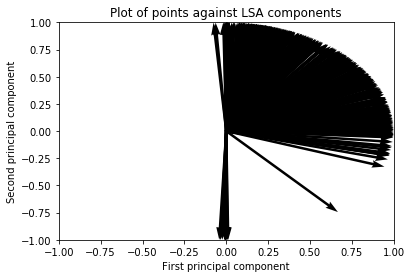

In [21]:
plt.figure()
ax = plt.gca()
ax.quiver(0,0,xs,ys,angles='xy',scale_units='xy',scale=1, linewidth = .01) 
# ax.quiver(0,0,xs,ys,scale=1, linewidth = .01)
ax.set_xlim([-1,1])
ax.set_ylim([-1,1])
xlabel('First principal component')
ylabel('Second principal component')
title('Plot of points against LSA components')
plt.draw()
plt.show()

In [22]:
# Computes document similarity using LSA components
# like a correlation matrix but for NLP
# document similary across all captions
similarity = np.asarray(numpy.asmatrix(dtm_lsa) * numpy.asmatrix(dtm_lsa).T) 
pd.DataFrame(similarity.round(6),index=(range(666)), columns=(range(666)))

0         1         2         3         4         5         6    \
0    1.000000  0.999295  0.981034  0.158795  0.454668  0.470662  0.278913   
1    0.999295  1.000000  0.987618  0.195740  0.487777  0.503446  0.314759   
2    0.981034  0.987618  1.000000  0.347160  0.618687  0.632760  0.459767   
3    0.158795  0.195740  0.347160  1.000000  0.951559  0.945857  0.992422   
4    0.454668  0.487777  0.618687  0.951559  1.000000  0.999837  0.982129   
5    0.470662  0.503446  0.632760  0.945857  0.999837  1.000000  0.978574   
6    0.278913  0.314759  0.459767  0.992422  0.982129  0.978574  1.000000   
7    0.153772  0.190750  0.342386  0.999987  0.949983  0.944194  0.991784   
8    0.181297  0.218080  0.368483  0.999739  0.958331  0.953022  0.994969   
9    0.162607  0.199525  0.350779  0.999993  0.952739  0.947104  0.992889   
10   0.850144  0.869307  0.936084  0.654868  0.855512  0.864713  0.742771   
11   0.648479  0.676593  0.783734  0.854549  0.972843  0.976860  0.911893   
12   0.931540  0.944532  0.984359  0.506949  0.747421  0.759284  0.609027   
13   0.054360  0.091798  0.246878  0.994484  0.914060  0.906594  0.974058   
14   0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
15   0.557962  0.588715  0.708237  0.907939  0.992817  0.994814  0.952557   
16   0.176739  0.213556  0.364171  0.999834  0.956997  0.951608  0.994494   
17   0.591407  0.621255  0.736494  0.890054  0.987099  0.989827  0.939324   
18   0.339010  0.374081  0.514938  0.982679  0.992055  0.989624  0.998003   
19   0.850630  0.869764  0.936409  0.654170  0.855033  0.864249  0.742152   
20   0.969414  0.977943  0.998601  0.396255  0.659358  0.672814  0.506073   
21   0.484054  0.516555  0.644488  0.940801  0.999446  0.999884  0.975322   
22   0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
23   0.993187  0.988114  0.951762  0.042662  0.347782  0.364639  0.165106   
24   0.856104  0.874897  0.940042  0.646192  0.849540  0.858919  0.735074   
25   0.092460  0.129767  0.283713  0.997765  0.928884  0.922052  0.981991   
26   0.249554  0.285723  0.432524  0.995702  0.975945  0.971853  0.999537   
27   0.742835  0.767439  0.858515  0.778938  0.934018  0.940311  0.850093   
28   0.173896  0.210734  0.361481  0.999883  0.956156  0.950717  0.994187   
29   0.200860  0.237486  0.386936  0.999086  0.963834  0.958869  0.996768   
..        ...       ...       ...       ...       ...       ...       ...   
636  0.937413  0.949822  0.987132  0.492657  0.736357  0.748443  0.595856   
637  0.770435  0.793820  0.879397  0.751771  0.918105  0.925106  0.827104   
638  0.144243  0.181282  0.333317  0.999892  0.946929  0.940976  0.990505   
639  0.215118  0.251620  0.400336  0.998356  0.967616  0.962905  0.997833   
640 -0.058977 -0.021468  0.135640  0.976228  0.862296  0.853020  0.942196   
641  0.117772  0.154960  0.308025  0.999142  0.938010  0.931604  0.986481   
642  0.235599  0.271908  0.419510  0.996931  0.972708  0.968364  0.998995   
643  0.348360  0.383296  0.523448  0.980785  0.993259  0.991006  0.997325   
644  0.056328  0.018816 -0.138268 -0.976799 -0.863636 -0.854401 -0.943081   
645  0.737055  0.761901  0.854077  0.784298  0.937053  0.943200  0.854587   
646  0.223002  0.259432  0.407727  0.997861  0.969624  0.965054  0.998332   
647  0.986523  0.979687  0.936097 -0.004890  0.302810  0.319954  0.118025   
648  0.994443  0.997694  0.995988  0.261851  0.545905  0.560931  0.378459   
649  0.127051  0.164190  0.316907  0.999486  0.941209  0.934962  0.987970   
650  0.550890  0.581826  0.702213  0.911467  0.993798  0.995642  0.955109   
651  0.448640  0.481867  0.613365  0.953614  0.999977  0.999693  0.983378   
652  0.147965  0.184980  0.336861  0.999940  0.948132  0.942243  0.991015   
653 -0.056225 -0.018713  0.138371  0.976821  0.863688  0.854455  0.943115   
654  0.082476  0.119822  0.274088  0.997045  0.925126  0.918126  0.980048   
655  0.177674  0.214484  0.365056  0.999817  0.957272  0.951900  0.994593   
656  0

## NMF

In [23]:
# fit nmf with two components
nmf_model = NMF(2)

dtm_nmf = nmf_model.fit_transform(dtm)
dtm_nmf = Normalizer(copy=False).fit_transform(dtm_nmf)

In [24]:
dtm.shape

(666, 2347)

In [25]:
dtm_nmf.round(2)

array([[1.  , 0.04],
       [1.  , 0.07],
       [0.96, 0.27],
       ...,
       [0.  , 0.  ],
       [0.99, 0.13],
       [0.  , 1.  ]])

In [26]:
nmf_model.components_.shape

(2, 2347)

In [27]:
# create dataframe of latent (component) to term matrix
pd.DataFrame(nmf_model.components_[:,:],index = ["component_1","component_2"],columns = vectorizer.get_feature_names())

07  09champs  0ddshad    0doubt        10  1045thezone  \
component_1  0.002342   0.00000  0.00000  0.004664  0.013656     0.000021   
component_2  0.000067   0.01384  0.01193  0.008931  0.063696     0.000044   

                10apg      10th        11      11th    ...          ÊÄéÈ∫ºÊ®£  \
component_1  0.000742  0.001372  0.004679  0.001001    ...     0.000000   
component_2  0.001421  0.034282  0.132788  0.016564    ...     0.000761   

               Êàë‰∏çÊòØÈñãÁé©Á¨ë   ÊàëÂ∑≤Á∂ìÂø´Âà∞6m  ÊàëÂæàÊÑüË¨ùÊØèÂ§©ÊúâÊ©üÊúÉÊâìÁ±ÉÁêÉ   ÊàëËá™Â∑±Áï´‰∫ÜËñØÊ¢ù       Êûó‰π¶Ë±™   ÊØçË¶™ÁØÄÂø´Ê®ÇÂ™ΩÂ™Ω  \
component_1  0.001426  0.001426      0.000000  0.000000  0.005253  0.000000   
component_2  0.002217  0.002217      0.011437  0.000761  0.002190  0.025725   

               ÁßªÂä®ÈÇ£Â∫ßÂ±±Â≥∞  Ë´ãÂ§ßÂÆ∂ÁèæÂú®ÂéªÁúãÊàëÁöÑÊñ∞mv       ÈúÄË¶ÅÁúã  
component_1  0.005253      0.001426  0.001426  
component_2  0.002190      0.002217  0.002217  

[2 rows x 2347 columns]

In [28]:
# show dense dtm format
print(dtm)

  (0, 117)	1
  (0, 296)	1
  (0, 585)	1
  (0, 1010)	1
  (0, 1222)	1
  (0, 1223)	1
  (0, 1348)	1
  (0, 1490)	1
  (0, 1517)	1
  (0, 1523)	1
  (0, 1552)	1
  (0, 1634)	1
  (0, 1926)	1
  (0, 2164)	1
  (0, 2167)	1
  (0, 2281)	1
  (1, 29)	1
  (1, 117)	1
  (1, 439)	1
  (1, 515)	2
  (1, 826)	1
  (1, 1223)	1
  (1, 1351)	1
  (1, 1513)	1
  (1, 1878)	1
  :	:
  (658, 894)	1
  (658, 1916)	1
  (660, 1697)	1
  (660, 2067)	1
  (661, 389)	1
  (661, 692)	1
  (661, 850)	1
  (661, 1424)	1
  (661, 1784)	1
  (661, 1916)	1
  (661, 1974)	1
  (661, 2033)	1
  (661, 2312)	1
  (662, 708)	1
  (662, 1441)	1
  (662, 1968)	1
  (662, 2091)	1
  (663, 1928)	1
  (664, 716)	1
  (664, 850)	1
  (664, 2257)	1
  (665, 165)	1
  (665, 894)	1
  (665, 1168)	1
  (665, 2016)	1


# NLP

In [29]:
sentences = sent_tokenize(df['LeBron James'][0])
sentences

[' Life s most persistent and urgent question is,  What are you doing for others      MLK   IG Stories will be used on this page as a platform for people bringing light to this world   AlwaysBelieve']

In [30]:
tokenizer = TreebankWordTokenizer()
tokenizer.tokenize(sentences[0])

['Life',
 's',
 'most',
 'persistent',
 'and',
 'urgent',
 'question',
 'is',
 ',',
 'What',
 'are',
 'you',
 'doing',
 'for',
 'others',
 'MLK',
 'IG',
 'Stories',
 'will',
 'be',
 'used',
 'on',
 'this',
 'page',
 'as',
 'a',
 'platform',
 'for',
 'people',
 'bringing',
 'light',
 'to',
 'this',
 'world',
 'AlwaysBelieve']

## POS (Part of Speech) tagging

In [31]:
words=pos_tag(word_tokenize(sentences[0]))
words

[('Life', 'NNP'),
 ('s', 'VBZ'),
 ('most', 'RBS'),
 ('persistent', 'JJ'),
 ('and', 'CC'),
 ('urgent', 'JJ'),
 ('question', 'NN'),
 ('is', 'VBZ'),
 (',', ','),
 ('What', 'WP'),
 ('are', 'VBP'),
 ('you', 'PRP'),
 ('doing', 'VBG'),
 ('for', 'IN'),
 ('others', 'NNS'),
 ('MLK', 'NNP'),
 ('IG', 'NNP'),
 ('Stories', 'NNP'),
 ('will', 'MD'),
 ('be', 'VB'),
 ('used', 'VBN'),
 ('on', 'IN'),
 ('this', 'DT'),
 ('page', 'NN'),
 ('as', 'IN'),
 ('a', 'DT'),
 ('platform', 'NN'),
 ('for', 'IN'),
 ('people', 'NNS'),
 ('bringing', 'VBG'),
 ('light', 'NN'),
 ('to', 'TO'),
 ('this', 'DT'),
 ('world', 'NN'),
 ('AlwaysBelieve', 'VBP')]

In [32]:
## the 'named entity' chunker!  ne_chunk utilizes 
words = word_tokenize(sentences[0])
tags = pos_tag(words)
tree = ne_chunk(tags)
print(tags)
print(tree)

[('Life', 'NNP'), ('s', 'VBZ'), ('most', 'RBS'), ('persistent', 'JJ'), ('and', 'CC'), ('urgent', 'JJ'), ('question', 'NN'), ('is', 'VBZ'), (',', ','), ('What', 'WP'), ('are', 'VBP'), ('you', 'PRP'), ('doing', 'VBG'), ('for', 'IN'), ('others', 'NNS'), ('MLK', 'NNP'), ('IG', 'NNP'), ('Stories', 'NNP'), ('will', 'MD'), ('be', 'VB'), ('used', 'VBN'), ('on', 'IN'), ('this', 'DT'), ('page', 'NN'), ('as', 'IN'), ('a', 'DT'), ('platform', 'NN'), ('for', 'IN'), ('people', 'NNS'), ('bringing', 'VBG'), ('light', 'NN'), ('to', 'TO'), ('this', 'DT'), ('world', 'NN'), ('AlwaysBelieve', 'VBP')]
(S
  (GPE Life/NNP)
  s/VBZ
  most/RBS
  persistent/JJ
  and/CC
  urgent/JJ
  question/NN
  is/VBZ
  ,/,
  What/WP
  are/VBP
  you/PRP
  doing/VBG
  for/IN
  others/NNS
  (ORGANIZATION MLK/NNP)
  IG/NNP
  Stories/NNP
  will/MD
  be/VB
  used/VBN
  on/IN
  this/DT
  page/NN
  as/IN
  a/DT
  platform/NN
  for/IN
  people/NNS
  bringing/VBG
  light/NN
  to/TO
  this/DT
  world/NN
  AlwaysBelieve/VBP)


## Sentiment Analysis of each player

In [116]:
## sentiment of all players
fa = []
players = []
new = []
lst = []
i = 0
for i in captions:
    fa.append(TextBlob(i).sentiment[0])
    players.append(TextBlob(i).sentiment[1])
for j in fa:
    if j == float(0.0):
        del fa[j]
#         fa.pop(int(j))
    else:
        continue
for k in players:
    if k == float(0):
        del players[k]
#         players.pop(int(k))
    else:
        continue
    
print('Polarity: ' + str(sum(fa) / (len(fa))))
print('Subjectivity: ' + str(sum(players) / (len(players))))

TypeError: list indices must be integers or slices, not float

In [128]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer
sid = SentimentIntensityAnalyzer()
sid.polarity_scores(captions[0])

{'neg': 0.0, 'neu': 0.938, 'pos': 0.062, 'compound': 0.2648}

In [83]:
# sentiment of LeBron
king = []
james = []
i = 0
for i in captions[0:12]:
    james.append(TextBlob(i).sentiment[0])
    king.append(TextBlob(i).sentiment[1])
print('Polarity: ' + str(sum(james) / (len(james))))
print('Subjectivity: ' + str(sum(king) / (len(king))))

Polarity: 0.10243055555555558
Subjectivity: 0.43162037037037043


In [34]:
# sentiment of boogie
demarcus = []
cousins = []
i = 0
for i in captions[13:25]:
    demarcus.append(TextBlob(i).sentiment[0])
    cousins.append(TextBlob(i).sentiment[1])
print('Polarity: ' + str(sum(demarcus) / (len(demarcus))))
print('Subjectivity: ' + str(sum(cousins) / (len(cousins))))

Polarity: 0.23497474747474745
Subjectivity: 0.2757260101010101


In [35]:
len(captions)

666

In [36]:
TextBlob(captions[1]).sentiment
# for i in captions:
#     print(i)

Sentiment(polarity=0.03333333333333335, subjectivity=0.5)

In [37]:
king = TextBlob(sentences[0])
king

TextBlob(" Life s most persistent and urgent question is,  What are you doing for others      MLK   IG Stories will be used on this page as a platform for people bringing light to this world   AlwaysBelieve")

In [38]:
king.noun_phrases

WordList(['life s', 'urgent question', 'mlk ig stories', 'alwaysbelieve'])

In [39]:
king.words

WordList(['Life', 's', 'most', 'persistent', 'and', 'urgent', 'question', 'is', 'What', 'are', 'you', 'doing', 'for', 'others', 'MLK', 'IG', 'Stories', 'will', 'be', 'used', 'on', 'this', 'page', 'as', 'a', 'platform', 'for', 'people', 'bringing', 'light', 'to', 'this', 'world', 'AlwaysBelieve'])

In [40]:
stemmer = nltk.stem.porter.PorterStemmer()
for word in TextBlob(sentences[0]).words:
    print(stemmer.stem(word))

life
s
most
persist
and
urgent
question
is
what
are
you
do
for
other
mlk
IG
stori
will
be
use
on
thi
page
as
a
platform
for
peopl
bring
light
to
thi
world
alwaysbeliev


In [41]:
def get_count(item):
    return item[1]

for word, count in sorted(king.word_counts.items(), key=get_count, reverse=True):
    print("%15s %i" % (word, count))

            for 2
           this 2
           life 1
              s 1
           most 1
     persistent 1
            and 1
         urgent 1
       question 1
             is 1
           what 1
            are 1
            you 1
          doing 1
         others 1
            mlk 1
             ig 1
        stories 1
           will 1
             be 1
           used 1
             on 1
           page 1
             as 1
              a 1
       platform 1
         people 1
       bringing 1
          light 1
             to 1
          world 1
  alwaysbelieve 1


### TextBlob without stop words

In [42]:
stop = stopwords.words('english')
stop += ['.', ',', '(', ')', "'", '"']
stop = set(stop)

counter = Counter()

n = 2
for doc in sentences:
    words = TextBlob(doc).words
    words = [w for w in words if w not in stop]
    bigrams = ngrams(words, n)
    counter += Counter(bigrams)

for phrase, count in counter.most_common(30):
    print('%20s %i' % (" ".join(phrase), count))

     Life persistent 1
   persistent urgent 1
     urgent question 1
       question What 1
         What others 1
          others MLK 1
              MLK IG 1
          IG Stories 1
        Stories used 1
           used page 1
       page platform 1
     platform people 1
     people bringing 1
      bringing light 1
         light world 1
 world AlwaysBelieve 1


In [43]:
# CountVectorizer is a class; so `vectorizer` below represents an instance of that object.
vectorizer = CountVectorizer(ngram_range=(1,2))

# call `fit` to build the vocabulary
vectorizer.fit(sentences)

# then, use `get_feature_names` to return the tokens
print(vectorizer.get_feature_names())

# finally, call `transform` to convert text to a bag of words
x = vectorizer.transform(sentences)

['alwaysbelieve', 'and', 'and urgent', 'are', 'are you', 'as', 'as platform', 'be', 'be used', 'bringing', 'bringing light', 'doing', 'doing for', 'for', 'for others', 'for people', 'ig', 'ig stories', 'is', 'is what', 'life', 'life most', 'light', 'light to', 'mlk', 'mlk ig', 'most', 'most persistent', 'on', 'on this', 'others', 'others mlk', 'page', 'page as', 'people', 'people bringing', 'persistent', 'persistent and', 'platform', 'platform for', 'question', 'question is', 'stories', 'stories will', 'this', 'this page', 'this world', 'to', 'to this', 'urgent', 'urgent question', 'used', 'used on', 'what', 'what are', 'will', 'will be', 'world', 'world alwaysbelieve', 'you', 'you doing']


In [44]:
print('Sparse Matrix')
# A compressed version; the "sparse" matrix.
print(type(x))
print(x)

print ('Matrix')
x_back = x.toarray()
print(type(x_back))
print(x_back)

Sparse Matrix
<class 'scipy.sparse.csr.csr_matrix'>
  (0, 0)	1
  (0, 1)	1
  (0, 2)	1
  (0, 3)	1
  (0, 4)	1
  (0, 5)	1
  (0, 6)	1
  (0, 7)	1
  (0, 8)	1
  (0, 9)	1
  (0, 10)	1
  (0, 11)	1
  (0, 12)	1
  (0, 13)	2
  (0, 14)	1
  (0, 15)	1
  (0, 16)	1
  (0, 17)	1
  (0, 18)	1
  (0, 19)	1
  (0, 20)	1
  (0, 21)	1
  (0, 22)	1
  (0, 23)	1
  (0, 24)	1
  :	:
  (0, 36)	1
  (0, 37)	1
  (0, 38)	1
  (0, 39)	1
  (0, 40)	1
  (0, 41)	1
  (0, 42)	1
  (0, 43)	1
  (0, 44)	2
  (0, 45)	1
  (0, 46)	1
  (0, 47)	1
  (0, 48)	1
  (0, 49)	1
  (0, 50)	1
  (0, 51)	1
  (0, 52)	1
  (0, 53)	1
  (0, 54)	1
  (0, 55)	1
  (0, 56)	1
  (0, 57)	1
  (0, 58)	1
  (0, 59)	1
  (0, 60)	1
Matrix
<class 'numpy.ndarray'>
[[1 1 1 1 1 1 1 1 1 1 1 1 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
  1 1 1 1 1 1 1 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]]


In [45]:
pd.DataFrame(x_back, columns=vectorizer.get_feature_names())

alwaysbelieve  and  and urgent  are  are you  as  as platform  be  be used  \
0              1    1           1    1        1   1            1   1        1   

   bringing    ...      used  used on  what  what are  will  will be  world  \
0         1    ...         1        1     1         1     1        1      1   

   world alwaysbelieve  you  you doing  
0                    1    1          1  

[1 rows x 61 columns]

In [46]:
# TF: frequency in this document
# IDF: inverse frequency in the corpus

vectorizer = TfidfVectorizer(stop_words="english", ngram_range=(1,2))
doc_vectors = vectorizer.fit_transform(sentences) # remember, this is our movie review dataset

classes = np.array(['pos']*50 + ['neg']*50)
# figure out how to reshape
model = MultinomialNB().fit(doc_vectors, classes)

ValueError: Found input variables with inconsistent numbers of samples: [1, 100]

# Clustering Models

In [ ]:
sentences

In [ ]:
# get silhoutte score for K-Means, similar to F1 score

# Topic Modeling

In [47]:
n_components = 10

In [65]:
tf_vectorizer = CountVectorizer(max_df=0.95, min_df=2,
                                ngram_range=(1,3),
                                max_features=1000,
                                stop_words='english')
tf = tf_vectorizer.fit_transform(captions)
lda = LatentDirichletAllocation(n_components=n_components, max_iter=5,
                                learning_method='online',
                                learning_offset=50.,
                                random_state=0)
lda.fit(tf)

vocab = tf_vectorizer.get_feature_names()

In [66]:
pyLDAvis.sklearn.prepare(lda, tf, tf_vectorizer)

/Users/cyrusrustomji/anaconda3/lib/python3.6/site-packages/pyLDAvis/_prepare.py:387: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  topic_term_dists = topic_term_dists.ix[topic_order]
/Users/cyrusrustomji/anaconda3/lib/python3.6/site-packages/pyLDAvis/_prepare.py:257: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=True'.

To retain the current behavior and silence the warning, pass sort=False

  return pd.concat([default_term_info] + list(topic_dfs))


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
8     -0.093327 -0.127125       1        1  29.266708
4     -0.068506  0.004170       2        1  17.772292
6      0.003659  0.009993       3        1  11.419807
7     -0.022685  0.043046       4        1  11.315951
0      0.008488  0.078034       5        1   8.539340
2     -0.007568  0.020863       6        1   5.941127
5     -0.002943  0.021889       7        1   4.700582
1     -0.009757  0.003926       8        1   4.090710
3      0.188682 -0.058593       9        1   3.816183
9      0.003957  0.003798      10        1   3.137298, topic_info=     Category       Freq                Term      Total  loglift  logprob
term                                                                     
318   Default  45.000000               happy  45.000000  30.0000  30.0000
293   Default  23.000000               great  23.000000  29.0000  29.0000
183   Default  33.000000                 day  33.000000  28.0000  28.0000
267   Default  13.000000                game  13.000000  27.0000  27.0000
94    Default  12.000000                 bio  12.000000  26.0000  26.0000
121   Default  11.000000                camp  11.000000  25.0000  25.0000
607   Default  14.000000              season  14.000000  24.0000  24.0000
10    Default   6.000000                2017   6.000000  23.0000  23.0000
698   Default  25.000000               thank  25.000000  22.0000  22.0000
442   Default  35.000000                love  35.000000  21.0000  21.0000
726   Default   7.000000           tp13lewis   7.000000  20.0000  20.0000
372   Default   7.000000            jaycroff   7.000000  19.0000  19.0000
420   Default  10.000000                link  10.000000  18.0000  18.0000
281   Default   8.000000               going   8.000000  17.0000  17.0000
373   Default   4.000000  jaycroff tp13lewis   4.000000  16.0000  16.0000
25    Default   5.000000     aagbasketball10   5.000000  15.0000  15.0000
63    Default   5.000000        ba_eagles_tn   5.000000  14.0000  14.0000
236   Default  10.000000              family  10.000000  13.0000  13.0000
781   Default  10.000000                 win  10.000000  12.0000  12.0000
421   Default   9.000000            link bio   9.000000  11.0000  11.0000
803   Default  17.000000                year  17.000000  10.0000  10.0000
415   Default  19.000000                like  19.000000   9.0000   9.0000
511   Default  11.000000               night  11.000000   8.0000   8.0000
97    Default  18.000000            birthday  18.000000   7.0000   7.0000
407   Default  13.000000                 let  13.000000   6.0000   6.0000
242   Default   5.000000            favorite   5.000000   5.0000   5.0000
286   Default  13.000000                good  13.000000   4.0000   4.0000
331   Default   5.000000              having   5.000000   3.0000   3.0000
500   Default   5.000000                 nba   5.000000   2.0000   2.0000
638   Default   5.000000          sreall2408   5.000000   1.0000   1.0000
...       ...        ...                 ...        ...      ...      ...
708   Topic10   0.516723               thing   2.892076   1.7396  -5.3013
497   Topic10   0.379145       nathanielwood   2.195752   1.7054  -5.6109
291   Topic10   0.376078      gq vincecamuto   2.259111   1.6689  -5.6190
228   Topic10   0.396674           everybody   2.397455   1.6628  -5.5657
598   Topic10   0.360105                 sam   2.203216   1.6505  -5.6624
202   Topic10   0.381755                  dr   2.402191   1.6225  -5.6041
510   Topic10   0.389591                nice   2.551420   1.5825  -5.5837
460   Topic10   0.357420               major   2.361042   1.5739  -5.6699
226   Topic10   0.368056                 est   2.485002   1.5520  -5.6406
499   Topic10   0.368849            national   2.500217   1.5481  -5.6384
61    Topic10   0.378248              august   2.579282   1.5421  -5.6133
649   Topic10   0.390152      stephencurry30   2.6705

In [49]:
for topic in range(n_components):
    print(f"TOPIC {topic}")
    for j in np.argsort(lda.components_,1)[topic,:10]:
        print(vocab[j])
    print()

TOPIC 0
www teo4
thing
just like
2017 runngun training
years old
great win
fvv23
fresh
support season
jezeru

TOPIC 1
ne
did
queen
workouts
srebrnom
going fun
things
friend
pushed
tommyzweibel

TOPIC 2
grand
like
style
stand
youtube com
news
got
selected
acbeardserum acfirmhold
vision

TOPIC 3
school
long
wb
james
starting
homie
supermario
acfirmhold backtoorigin grooming
americancrew
town

TOPIC 4
mother day
heretheycome
www
great time
girl
23 30
link
gold
na
grooming style beard

TOPIC 5
august
annual
friend
great
game
provide
happy birthday
tough
lil guy
course

TOPIC 6
brodie say
entire
rs
got
23
chapter
food
look
minutes
mother day

TOPIC 7
today told
working
cred
mothers day
jaycroff tp13lewis
wake
years later
miss
having
academy

TOPIC 8
tough
great year
alwaysbelieve
looks
stile icon interview
draft
ne
heretheycome philaunite
swag
away

TOPIC 9
jezeru
beard capelli stile
17
especially
heroesfoundation
little bit
matter
heart
hungry
turkiye



In [50]:
lda.perplexity(tf)

2148.2775218284933

In [51]:
x = lda.transform(tf)
y = captions

In [52]:
pca = PCA(4).fit_transform(x)
pca0 = pca[:,0]
pca1 = pca[:,1]
pca2 = pca[:,2]
pca3 = pca[:,3]

In [53]:
import matplotlib.pyplot as plt
%matplotlib inline
%config InlineBackend.figure_format = 'svg'

AttributeError: 'list' object has no attribute 'shape'

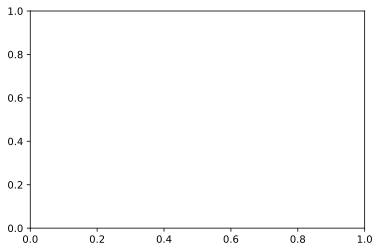

In [54]:
plt.scatter(pca0,pca1,c=y);

# Word2Vec

In [55]:
vectorizer = CountVectorizer(ngram_range=(1,2))

vectorizer.fit(captions)
x = vectorizer.transform(captions)
x_back = x.toarray()

pd.DataFrame(x_back, columns=vectorizer.get_feature_names())

07  09champs  09champs family  0ddshad  0ddshad dirty30  0doubt  \
0     0         0                0        0                0       0   
1     0         0                0        0                0       0   
2     0         0                0        0                0       0   
3     0         0                0        0                0       0   
4     0         0                0        0                0       0   
5     0         0                0        0                0       0   
6     0         0                0        0                0       0   
7     0         0                0        0                0       0   
8     0         0                0        0                0       0   
9     0         0                0        0                0       0   
10    0         0                0        0                0       0   
11    0         0                0        0                0       0   
12    0         0                0        0                0       0   
13    0         0                0        0                0       0   
14    0         0                0        0                0       0   
15    0         0                0        0                0       0   
16    0         0                0        0                0       0   
17    0         0                0        0                0       0   
18    0         0                0        0                0       0   
19    0         0                0        0                0       0   
20    0         0                0        0                0       0   
21    0         0                0        0                0       0   
22    0         0                0        0                0       0   
23    0         0                0        0                0       0   
24    0         0                0        0                0       0   
25    0         0                0        0                0       0   
26    0         0                0        0                0       0   
27    0         0                0        0                0       0   
28    0         0                0        0                0       0   
29    0         0                0        0                0       0   
..   ..       ...              ...      ...              ...     ...   
636   0         0                0        0                0       0   
637   0         0                0        0                0       0   
638   0         0                0        0                0       0   
639   0         0                0        0                0       0   
640   0         0                0        0                0       0   
641   0         0                0        0                0       0   
642   0         0                0        0                0       0   
643   0         0                0        0                0       0   
644   0         0                0        0                0       0   
645   0         0                0        0                0       0   
646   0         0                0        0                0       0   
647   0         0                0        0                0       0   
648   0         0                0        0                0       0   
649   0         0                0        0                0       0   
650   0         0                0        0                0       0   
651   0         0                0        0                0       0   
652   0         0                0        0                0       0   
653   0         0                0        0                0       0   
654   0         0                0        0                0       0   
655   0         0                0        0                0       0   
656   0         0                0        0                0       0   
657   0         0                0        0                0       0   
658   0         0                0        0                0       0   
659   0         0                0        0  

In [56]:
# Build corpus from 
import os
from nltk.corpus import stopwords
import gensim
stop = stopwords.words('english')
stop+=['?','!','.',',',':',';']

#creating our iterator


# An Illustration.. 

import os

class MySentences(object):
    # a memory-friendly way to load a large corpora
    def __init__(self, dirname):
        self.dirname = dirname

def __iter__(self):
    # iterate through all file names in our directory
    for fname in os.listdir(self.dirname):
        for line in open(os.path.join(self.dirname, fname), encoding="ISO-8859-1"):
            word=line.lower().split()
            if word not in stop:
                yield word

sentences = MySentences(captions) 
model = gensim.models.Word2Vec(sentences,size=100,min_count=3,workers=4)

/Users/cyrusrustomji/anaconda3/lib/python3.6/site-packages/scipy/sparse/sparsetools.py:21: DeprecationWarning: `scipy.sparse.sparsetools` is deprecated!
scipy.sparse.sparsetools is a private module for scipy.sparse, and should not be used.
  _deprecated()


TypeError: 'MySentences' object is not iterable

# LDA

In [57]:
from sklearn.feature_extraction.text import ENGLISH_STOP_WORDS
from sklearn.feature_extraction.text import TfidfVectorizer

In [58]:
# Create a TfidfVectorizer for parsing/counting words
tfidf = TfidfVectorizer(ngram_range=(1,2), min_df=3, stop_words=ENGLISH_STOP_WORDS)
x = tfidf.fit_transform(captions)
feature_names = tfidf.get_feature_names()
len(feature_names)

355

In [59]:
# Create a CountVectorizer for parsing/counting words
vect = CountVectorizer(ngram_range=(1,3), min_df=3, stop_words=ENGLISH_STOP_WORDS,strip_accents='unicode')
x = vect.fit_transform(captions)
feature_names = vect.get_feature_names()
len(feature_names)

359

In [67]:
num_topics = 10
lda = LatentDirichletAllocation(n_components=num_topics, max_iter = 15, random_state=0, 
                                n_jobs=-1, learning_method='batch')
document_topics = lda.fit_transform(x)
print("lda.components_.shape: {}".format(lda.components_.shape))

lda.components_.shape: (10, 359)


In [68]:
pyLDAvis.sklearn.prepare(lda, x, vect)

/Users/cyrusrustomji/anaconda3/lib/python3.6/site-packages/pyLDAvis/_prepare.py:387: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  topic_term_dists = topic_term_dists.ix[topic_order]
/Users/cyrusrustomji/anaconda3/lib/python3.6/site-packages/pyLDAvis/_prepare.py:257: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=True'.

To retain the current behavior and silence the warning, pass sort=False

  return pd.concat([default_term_info] + list(topic_dfs))


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
7     -0.140734  0.055645       1        1  13.855696
9      0.231351  0.016211       2        1  12.672897
2     -0.022211  0.135053       3        1  10.401809
0      0.208420  0.020271       4        1  10.240611
1     -0.038912  0.118291       5        1  10.188535
5     -0.009866 -0.160968       6        1   9.599652
6     -0.069567  0.119312       7        1   9.031124
3      0.016652 -0.136173       8        1   9.006496
4     -0.052509 -0.058746       9        1   8.124935
8     -0.122625 -0.108895      10        1   6.878246, topic_info=     Category       Freq                Term      Total  loglift  logprob
term                                                                     
181   Default  47.000000                love  47.000000  30.0000  30.0000
137   Default  44.000000               happy  44.000000  29.0000  29.0000
167   Default  22.000000                like  22.000000  28.0000  28.0000
78    Default  37.000000                 day  37.000000  27.0000  27.0000
296   Default  32.000000               thank  32.000000  26.0000  26.0000
37    Default  18.000000            birthday  18.000000  25.0000  25.0000
163   Default  15.000000                 let  15.000000  24.0000  24.0000
139   Default  13.000000      happy birthday  13.000000  23.0000  23.0000
256   Default  23.000000              season  23.000000  22.0000  22.0000
104   Default  17.000000              family  17.000000  21.0000  21.0000
201   Default  11.000000              mother  11.000000  20.0000  20.0000
156   Default  19.000000                just  19.000000  19.0000  19.0000
131   Default  25.000000               great  25.000000  18.0000  18.0000
120   Default  19.000000                game  19.000000  17.0000  17.0000
134   Default  14.000000                 guy  14.000000  16.0000  16.0000
320   Default   7.000000     trusttheprocess   7.000000  15.0000  15.0000
12    Default   7.000000               76ers   7.000000  14.0000  14.0000
69    Default  10.000000            congrats  10.000000  13.0000  13.0000
128   Default  14.000000                 got  14.000000  12.0000  12.0000
125   Default  12.000000               going  12.000000  11.0000  11.0000
44    Default  10.000000                 bro  10.000000  10.0000  10.0000
127   Default  22.000000                good  22.000000   9.0000   9.0000
140   Default   8.000000        happy mother   8.000000   8.0000   8.0000
202   Default   8.000000          mother day   8.000000   7.0000   7.0000
141   Default   8.000000    happy mother day   8.000000   6.0000   6.0000
302   Default   7.000000       theresurgence   7.000000   5.0000   5.0000
168   Default  10.000000                 lil  10.000000   4.0000   4.0000
283   Default  16.000000             support  16.000000   3.0000   3.0000
36    Default  15.000000                 bio  15.000000   2.0000   2.0000
242   Default   9.000000             respect   9.000000   1.0000   1.0000
...       ...        ...                 ...        ...      ...      ...
13    Topic10   2.608993        76ers turkey   3.392439   2.4142  -4.1345
152   Topic10   2.608991  jaycroff tp13lewis   3.392439   2.4142  -4.1345
14    Topic10   2.608991     aagbasketball10   3.392439   2.4142  -4.1345
23    Topic10   2.608991        ba_eagles_tn   3.392439   2.4142  -4.1345
46    Topic10   5.133809             brother   6.760554   2.4015  -3.4576
324   Topic10   3.450660              turkey   5.077332   2.2906  -3.8549
7     Topic10   3.450620                2017   5.113060   2.2836  -3.8549
208   Topic10   5.809810                 nba  10.183792   2.1156  -3.3339
213   Topic10   1.767328                open   3.393052   2.0245  -4.5239
322   Topic10   1.767393              trying   3.410898   2.0193  -4.5239
77    Topic10   1.767389                dawg   3.429839   2.0138  -4.5239
307   Topic10   1.767336                 tho   3.4298